In [81]:
!pip install seaborn --upgrade
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

from scipy import stats

In [40]:
def statistical_analysis(r, q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]):
    
    if (type(r) is not list) & (type(r) is not tuple):
        print("Нужен список или кортеж")
        return
    
    if len(r)<=4:
        print("Need a longer row!")
        return
    
    r = pd.Series(r)
    
    m = r.mean()
    v = r.var()
    s = r.std()
    
    print("Среднее ряда = ", m)
    print("Дисперсия ряда = ", v)
    print("Стандартное отклонение ряда = ", s)
    print()
    
    qs = np.quantile(r, q)

    for i in range(len(q)):
        if q[i]==0.5:
            print("Mediane = ", qs[i])
        elif q[i]==0.25:
            print("First quartile = ", qs[i])
        elif q[i]*100 % 10==0:
            print("Decile number", q[i]*10, " = ", qs[i])
        else:
            print("Quantile ", q[i], " = ", qs[i])
        
    sns.distplot(r)

    return m, v, s, qs

In [116]:
def test_calc(r1, r2, alpha = 0.05):
    
    s,p = ttest_ind(r1,r2)
    
    if p < alpha:
        print("Гиптоеза Н0 не подтверждается: средние не равны")
        print("Разница средних = ", r1.mean()-r2.mean())
    else:
        print("Гипотеза Н0 подтверждается: средние равны")
        print("Разница средних = 0")
        
    return s, p


In [103]:
def mann_whitney_func(r1, r2, alpha=0.5):
    
    s, p = mannwhitneyu(r1, r2)
    
    if p < alpha:
        print("Распределения не равны")
    else:
        print("Распределения равны")
        
    return s, p

Вторая часть курсовой работы

In [43]:
df = pd.read_csv(r'C:\Users\vkoma\Downloads\Dataset_AB_TEST.csv', sep=';')

In [44]:
df.head()

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14


In [45]:
df.describe()

,id_client,sum_pay,id_point,months_reg
count,1.097600e+04,10849.000000,10895.000000,10976.000000
mean,1.373018e+06,3568.751037,1180.040385,4.717566
std,1.477359e+04,2927.164583,4.345107,3.185566
min,1.359000e+06,59.000000,1178.000000,0.000000
25%,1.361744e+06,1251.000000,1178.000000,2.000000
50%,1.370690e+06,3173.000000,1179.000000,4.000000
75%,1.373433e+06,5358.000000,1179.000000,7.000000
max,1.420345e+06,24797.000000,1199.000000,14.000000


In [46]:
df.groupby('id_group').count()

,id_client,sum_pay,id_point,months_reg
id_group,,,,
control,5202,5175,5198,5202
test,5700,5673,5696,5700


In [47]:
len(df[df['id_group'].isnull()])

74

In [48]:
len(df[df['id_point'].isnull()])

81

In [49]:
df = df[(~df['id_group'].isnull())&(~df['sum_pay'].isnull())&(~df['id_point'].isnull())]


Среднее ряда =  3568.7580258302582
Дисперсия ряда =  8568932.941996625
Стандартное отклонение ряда =  2927.27397795229

Decile number 1.0  =  410.0
First quartile =  1250.75
Decile number 3.0  =  1590.0
Decile number 4.0  =  2329.6000000000004
Mediane =  3173.5
Decile number 6.0  =  3934.0
Quantile  0.75  =  5356.5
Decile number 9.0  =  7088.200000000001
Quantile  0.95  =  7805.0999999999985
Quantile  0.96  =  8041.0
Quantile  0.97  =  8453.64
Quantile  0.98  =  9043.659999999998
Quantile  0.99  =  9809.76000000001
Quantile  0.995  =  21046.075000000004


C:\Users\vkoma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(3568.7580258302582,
 8568932.941996625,
 2927.27397795229,
 array([  410.   ,  1250.75 ,  1590.   ,  2329.6  ,  3173.5  ,  3934.   ,
         5356.5  ,  7088.2  ,  7805.1  ,  8041.   ,  8453.64 ,  9043.66 ,
         9809.76 , 21046.075]))

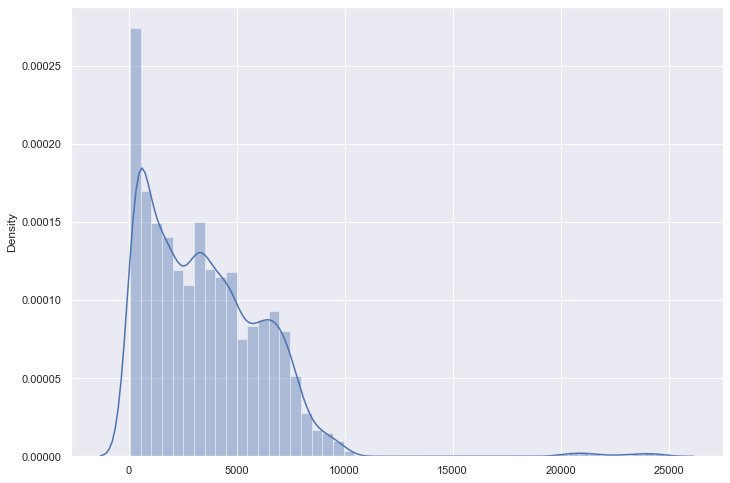

In [50]:
statistical_analysis(tuple(df['sum_pay']), q=[.1,.25,.3,.4,.5,.6,.75,.9,.95,.96,.97,.98,.99,.995])

In [51]:
df = df[df['sum_pay']<20000] #обрежем хвост, который дает "смещенный" результат.

In [52]:
df_A = df[df['id_group']=='control']
df_B = df[df['id_group']=='test']

In [53]:
def show_dist(r1, r2, graph_title, xlabel='Размер платежа', ylabel='Кол-во людей'):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    ax1 = sns.distplot(r1, color='purple')
    ax2 = sns.distplot(r2, color='blue')
    ax1.set(xlabel=xlabel, ylabel=ylabel)
    plt.title(graph_title)
    plt.show()

C:\Users\vkoma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vkoma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


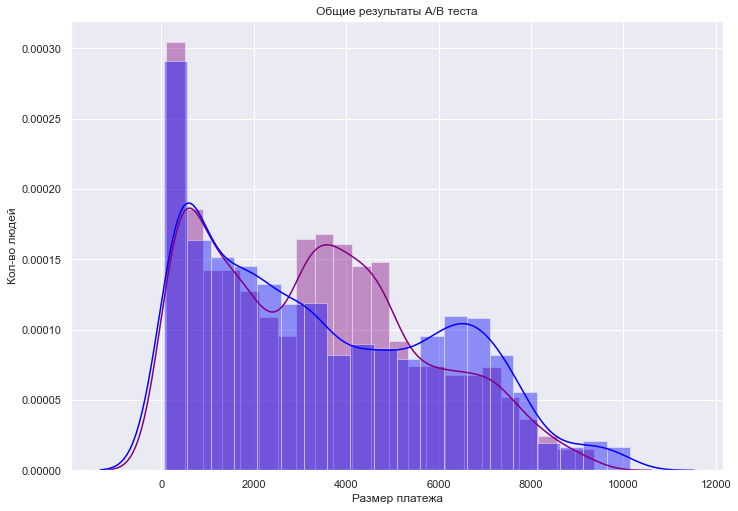

In [54]:
show_dist(df_A['sum_pay'], df_B['sum_pay'], 'Общие результаты А/В теста')

In [55]:
mann_whitney_func(df_A['sum_pay'], df_B['sum_pay'])

Распределения не равны


(14141330.5, 0.05842125879702285)

In [119]:
test_calc(df_A['sum_pay'], df_B['sum_pay'])

Гиптоеза Н0 не подтверждается: средние не равны
Разница средних =  -175.82591504758784


(-3.7141912292177888, 0.0002048855494553075)

In [74]:
df

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [ ]:
Оценим наши выборки по сегментам( точкам) и отсеим неподходящее.

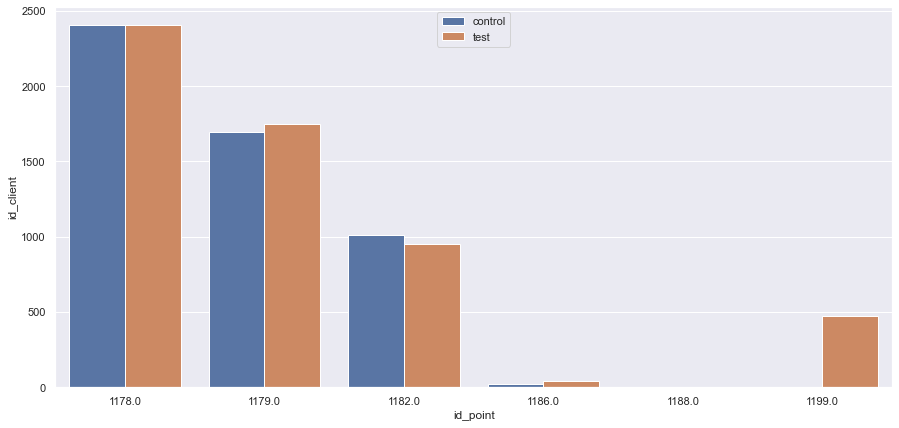

,id_group,id_point,id_client
0,control,1178.0,2403
5,test,1178.0,2406
1,control,1179.0,1697
6,test,1179.0,1745
2,control,1182.0,1012
7,test,1182.0,950
3,control,1186.0,23
8,test,1186.0,40
4,control,1188.0,5
9,test,1188.0,4


In [72]:
df_1=df.groupby(by=['id_group', 'id_point'])['id_client'].count().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x='id_point', y='id_client', hue='id_group', data=df_1)
plt.legend()
plt.show()
df_1.sort_values(by='id_point')

# Далее проведем t тест для выбранных сегментов(точек)

In [84]:
point=[1178, 1179, 1182] # можно провести тесты как выше по каждому сегменту с помощью самописных функций из 1 задания, но будет более энергозатратно
for i in df['id_point'].unique():
    if i in point:
        print(i)
        s, p = ttest_ind(df[(df['id_point']== i) & (df['id_group']=='control')]['sum_pay'], 
                         df[(df['id_point']== i) & (df['id_group']== 'test')]['sum_pay'])
        print (p)
        if p<=0.05:
            print ('Средние не равны')
            print() 
        else:
            print ('Средние равны')
            print() 

1182.0
1.0387447468996453e-12
Средние не равны

1178.0
0.1251217226713009
Средние равны

1179.0
0.2617037465196552
Средние равны



Средние равны в сегменте  1882, 0

# Далее проведем тест Мана - Уитни для выбранных сегментов (точек)

In [94]:
point=[1178, 1179, 1182]

for i in df['id_point'].unique():
    if i in point:
        print(i)
        s, p = stats.mannwhitneyu(df[(df['id_point']== i) & (df['id_group']=='control')]['sum_pay'],
                                  df[(df['id_point']== i) & (df['id_group']== 'test')]['sum_pay'])
        print(s, p)
        if p<=0.05:
            print ('Распределения не равны')
            print()
        else:
            print ('Распределения равны')
            print()

1182.0
382818.5 5.946812205351181e-15
Распределения не равны

1178.0
3122337.5 1.5133330174771163e-06
Распределения не равны

1179.0
1447666.5 0.2580763851815786
Распределения равны



In [88]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr


C:\Users\vkoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Корреляция размера платежа и длительности жизни клиента')

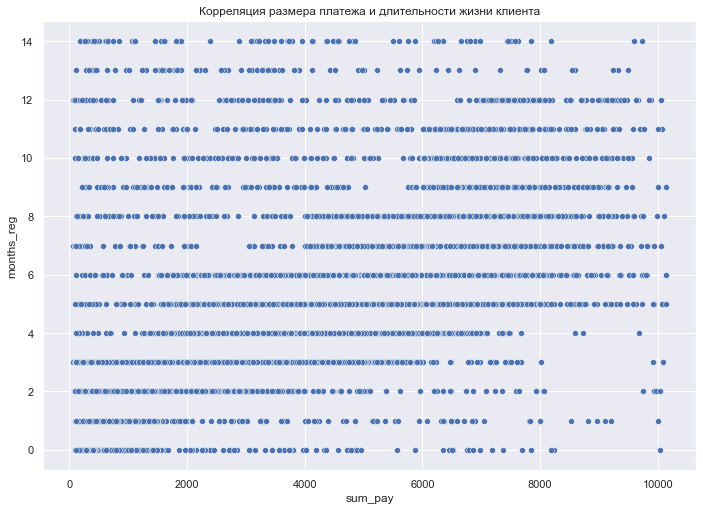

In [89]:
sns.scatterplot(df['sum_pay'], df['months_reg']).set_title("Корреляция размера платежа и длительности жизни клиента")

In [90]:
print("Pearson", pearsonr(df['sum_pay'],df['months_reg']))
print("Spearman", spearmanr(df['sum_pay'],df['months_reg']))

Pearson (0.598276252133036, 0.0)
Spearman SpearmanrResult(correlation=0.6520008575703581, pvalue=0.0)
